In [2]:
import requests
import bs4
import numpy as np
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt

def flatten(arr):
    if isinstance(arr, list):
        flattened = []
        for a in arr:
            if isinstance(a, list):
                flattened += a
            else:
                flattened += [a]
        if len(arr) == len(flattened):
            return flattened
        else:
            return flatten(flattened)
    else:
        return arr

In [5]:
siteOrigin = "https://www.vivareal.com.br/"

link0 = "https://www.vivareal.com.br/aluguel/rj/rio-de-janeiro/apartamento_residencial/"
res0 = requests.get(link0)
soup0 = bs4.BeautifulSoup(res0.text,"lxml")
links = [link0]

linkTemp = "https://www.vivareal.com.br/aluguel/rj/rio-de-janeiro/apartamento_residencial/?pagina=2"
res = requests.get(linkTemp)
soup =  bs4.BeautifulSoup(res.text,"lxml")
i = 2
while str(soup0)[:1000] != str(soup)[:1000]:
    clear_output()
    print("Pages Found: " + str(i))
    links += [linkTemp]
    i += 1
    linkTemp = "https://www.vivareal.com.br/aluguel/rj/rio-de-janeiro/apartamento_residencial/?pagina=" + str(i)
    res = requests.get(linkTemp)
    soup =  bs4.BeautifulSoup(res.text,"lxml")
    

# allTags = list(sorted(np.unique(flatten([tag.name for tag in soup.find_all(class_=True)]))))
# allClasses = list(sorted(np.unique(flatten([tag['class'] for tag in soup.find_all(class_=True)]))))

Pages Found: 372


KeyboardInterrupt: 

In [6]:
soup0

<!DOCTYPE html>
<html lang="pt-BR" prefix="og: https://ogp.me/ns#"> <head> <meta content="5DB2670D7BB1D1D3E36C46F7C3D59380" name="msvalidate.01"/> <meta content="omni2c019e0" name="omniverify"/> <meta content="https://www.vivareal.com.br/aluguel/rj/rio-de-janeiro/apartamento_residencial/" property="og:url"/> <meta content="" property="og:type"/> <meta content="" property="og:image"/> <meta content="image/jpeg" property="og:image:type"/> <meta content="" property="og:image:secure_url"/> <meta content="Apartamentos para alugar em Rio de Janeiro, RJ - Viva Real" property="og:title"/> <meta content="Mais de 17.718 apartamentos para alugar em Rio de Janeiro, Rio de Janeiro. Acesse as melhores ofertas de aluguel de apartamentos em Rio de Janeiro." property="og:description"/> <meta content="Mais de 17.718 apartamentos para alugar em Rio de Janeiro, Rio de Janeiro. Acesse as melhores ofertas de aluguel de apartamentos em Rio de Janeiro." name="description"/> <title> Apartamentos para alugar em

In [582]:
interestingClass = '.js-property-card'
properties = ['titulo', 'preco', 'endereco', 'area', 'nQuartos', 'nBanheiros', 'nVagas', 'link']
casas = {p:[] for p in properties}

for i in range(len(links)):
    res = requests.get(links[i])
    soup = bs4.BeautifulSoup(res.text,"lxml")
    
    for j in range(len(soup.select(interestingClass))):
        clear_output()
        print("Page: " + str(i) + " / " + str(len(links)) + " | Houses: " + str(j) + " / " + str(len(soup.select(interestingClass))))
        title = soup.select(interestingClass)[j].select('.property-card__title')[0].text[2:-2]
        address = soup.select(interestingClass)[j].select('.property-card__address')[0].text
        area = soup.select(interestingClass)[j].select('.property-card__detail-area')[0].text.replace(" ", "")
        nRooms = soup.select(interestingClass)[j].select('.property-card__detail-room')[0].text.replace(' ','').replace("Q"," Q")
        nBaths = soup.select(interestingClass)[j].select('.property-card__detail-bathroom')[0].text.replace(' ','').replace("B"," B")
        nGarage = soup.select(interestingClass)[j].select('.property-card__detail-garage')[0].text.replace(' ','').replace("V"," V")
        price = soup.select(interestingClass)[j].select('.property-card__price')[0].text.split("    ")[0].replace(' ','')
        href = siteOrigin + str(soup.select(interestingClass)[j]).split('href=\"')[1].split('\">')[0]
        casas['titulo'] += [title]
        casas['preco'] += [price]
        casas['endereco'] += [address]
        casas['area'] += [area]
        casas['nQuartos'] += [nRooms]
        casas['nBanheiros'] += [nBaths]
        casas['nVagas'] += [nGarage]
        casas['link'] += [href]
casas_df = pd.DataFrame(casas)

casas_df['preco_valor'] = [int(preco.replace("R$","").replace('/Mês',"").replace(".","")) for preco in casas_df['preco']]
casas_df['area_valor'] = [int(area.replace("m²","")) for area in casas_df['area']]
casas_df['nQuartos_valor'] = [int(nQuartos.replace(" Quartos","").replace(" Quarto","")) for nQuartos in casas_df['nQuartos']]
casas_df['nBanheiros_valor'] = [int(nBanheiros.replace(" Banheiros","").replace(" Banheiro","")) for nBanheiros in casas_df['nBanheiros']]
nVagasValor = [nVagas.replace(" Vagas","").replace(" Vaga","") for nVagas in casas_df['nVagas']]
for i in range(len(nVagasValor)):
    if nVagasValor[i] == '--':
        nVagasValor[i] = np.nan
    else:
        nVagasValor[i] = int(nVagasValor[i])
casas_df['nVagas_valor'] = nVagasValor
casas_df

Page: 3 / 4 | Houses: 35 / 36


titulo        preco  \
0        Casa com 3 Quartos para Aluguel, 100m²  R$1.400/Mês   
1        Casa com 2 Quartos para Aluguel, 100m²  R$1.500/Mês   
2         Casa com 3 Quartos para Aluguel, 85m²  R$1.000/Mês   
3    Casa com 2 Quartos para Venda/Aluguel 70m²    R$900/Mês   
4        Casa com 2 Quartos para Aluguel, 100m²    R$900/Mês   
..                                          ...          ...   
139  Casa com 2 Quartos para Venda/Aluguel 97m²    R$800/Mês   
140       Casa com 2 Quartos para Aluguel, 90m²  R$1.200/Mês   
141       Casa com 2 Quartos para Aluguel, 60m²    R$600/Mês   
142       Casa com 2 Quartos para Aluguel, 65m²    R$650/Mês   
143      Casa com 3 Quartos para Aluguel, 120m²  R$2.000/Mês   

                                              endereco   area   nQuartos  \
0    Rua Augusto Severo, 00 - Venda da Cruz, São Go...  100m²  3 Quartos   
1    Travessa Correia Torres, 319 - Paraíso, São Go...  100m²  2 Quartos   
2                      Venda da Cruz, São Gonçalo - RJ   85m²  3 Quartos   
3       Rua Luís Lópes, 90 - Arsenal, São Gonçalo - RJ   70m²  2 Quartos   
4                     Santa Catarina, São Gonçalo - RJ  100m²  2 Quartos   
..                                                 ...    ...        ...   
139  Rua Júlio Horta Barbosa, 31 - Mutuá, São Gonça...   97m²  2 Quartos   
140                         Trindade, São Gonçalo - RJ   90m²  2 Quartos   
141                  Jardim Catarina, São Gonçalo - RJ   60m²  2 Quartos   
142  Rua Adriano Pinto, 10 - Colubandê, São Gonçalo...   65m²  2 Quartos   
143  Rua Arlindo de Carvalho, 9 - Boaçu, São Gonçal...  120m²  3 Quartos   

      nBanheiros   nVagas                                               link  \
0    2 Banheiros   1 Vaga  https://www.vivareal.com.br//imovel/casa-3-qua...   
1    2 Banheiros   1 Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
2    2 Banheiros  -- Vaga  https://www.vivareal.com.br//imovel/casa-3-qua...   
3     1 Banheiro   1 Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
4    2 Banheiros  -- Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
..           ...      ...                                                ...   
139   1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
140   1 Banheiro  2 Vagas  https://www.vivareal.com.br//imovel/casa-2-qua...   
141   1 Banheiro   1 Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
142   1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
143  3 Banheiros  2 Vagas  https://www.vivareal.com.br//imovel/casa-3-qua...   

     preco_valor  area_valor  nQuartos_valor  nBanheiros_valor  nVagas_valor  
0           1400         100               3                 2           1.0  
1           1500         100               2                 2           1.0  
2           1000          85               3                 2           NaN  
3            900          70               2                 1           1.0  
4            900         100               2                 2           NaN  
..           ...         ...             ...               ...           ...  
139          800          97               2                 1           NaN  
140         1200          90               2                 1           2.0  
141          600          60               2                 1           1.0  
142          650          65               2                 1           NaN  
143         2000         120               3                 3           2.0  

[144 rows x 13 columns]

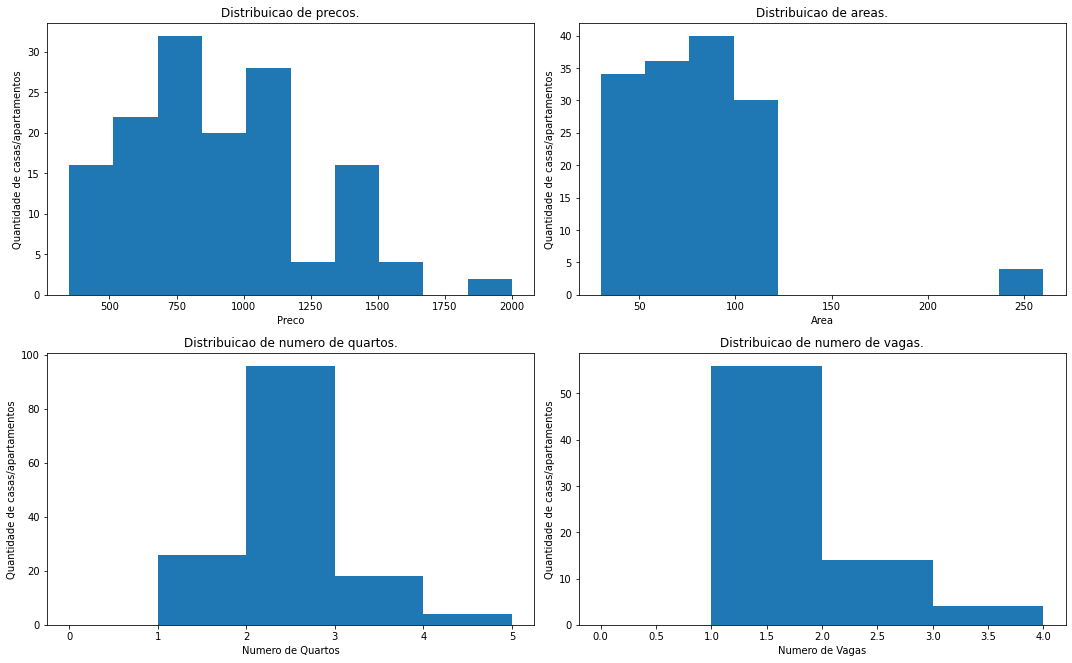

In [603]:
fig, ax = plt.subplots(2, 2, figsize = [1.5*10, 1.5*10/1.61])
ax[0, 0].hist(casas_df['preco_valor'])
ax[0, 0].set_title("Distribuicao de precos.")
ax[0, 0].set_xlabel("Preco")
ax[0, 0].set_ylabel("Quantidade de casas/apartamentos")

ax[0, 1].hist(casas_df['area_valor'])
ax[0, 1].set_title("Distribuicao de areas.")
ax[0, 1].set_xlabel("Area")
ax[0, 1].set_ylabel("Quantidade de casas/apartamentos")

ax[1, 0].hist(casas_df['nQuartos_valor'], bins = range(6))
ax[1, 0].set_title("Distribuicao de numero de quartos.")
ax[1, 0].set_xlabel("Numero de Quartos")
ax[1, 0].set_ylabel("Quantidade de casas/apartamentos")

ax[1, 1].hist(casas_df['nVagas_valor'], bins = range(5))
ax[1, 1].set_title("Distribuicao de numero de vagas.")
ax[1, 1].set_xlabel("Numero de Vagas")
ax[1, 1].set_ylabel("Quantidade de casas/apartamentos")

fig.tight_layout()

In [601]:
casas_df['goodness'] = casas_df['area_valor']*casas_df['nQuartos_valor']/casas_df['preco_valor']

In [602]:
casas_df.sort_values('goodness')

titulo        preco  \
23        Casa com  Quarto para Aluguel, 35m²    R$600/Mês   
95        Casa com  Quarto para Aluguel, 35m²    R$600/Mês   
22        Casa com  Quarto para Aluguel, 30m²    R$500/Mês   
94        Casa com  Quarto para Aluguel, 30m²    R$500/Mês   
130       Casa com  Quarto para Aluguel, 30m²    R$500/Mês   
..                                        ...          ...   
92      Casa com 3 Quartos para Aluguel, 80m²    R$650/Mês   
101  Casa com 5 Quartos à Venda/Aluguel 260m²  R$1.600/Mês   
136  Casa com 5 Quartos à Venda/Aluguel 260m²  R$1.600/Mês   
64   Casa com 5 Quartos à Venda/Aluguel 260m²  R$1.600/Mês   
29   Casa com 5 Quartos à Venda/Aluguel 260m²  R$1.600/Mês   

                                              endereco   area   nQuartos  \
23                         Zé Garoto, São Gonçalo - RJ   35m²   1 Quarto   
95                         Zé Garoto, São Gonçalo - RJ   35m²   1 Quarto   
22   Rua Leônidas Moreira, 275 - Colubandê, São Gon...   30m²   1 Quarto   
94   Rua Leônidas Moreira, 275 - Colubandê, São Gon...   30m²   1 Quarto   
130  Rua Leônidas Moreira, 275 - Colubandê, São Gon...   30m²   1 Quarto   
..                                                 ...    ...        ...   
92          Rua Cantagalo - Trindade, São Gonçalo - RJ   80m²  3 Quartos   
101  Travessa João Sampaio, 79 - Sete Pontes, São G...  260m²  5 Quartos   
136  Travessa João Sampaio, 79 - Sete Pontes, São G...  260m²  5 Quartos   
64   Travessa João Sampaio, 79 - Sete Pontes, São G...  260m²  5 Quartos   
29   Travessa João Sampaio, 79 - Sete Pontes, São G...  260m²  5 Quartos   

      nBanheiros   nVagas                                               link  \
23    1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-1-qua...   
95    1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-1-qua...   
22    1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-1-qua...   
94    1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-1-qua...   
130   1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-1-qua...   
..           ...      ...                                                ...   
92    1 Banheiro   1 Vaga  https://www.vivareal.com.br//imovel/casa-3-qua...   
101  4 Banheiros  2 Vagas  https://www.vivareal.com.br//imovel/casa-5-qua...   
136  4 Banheiros  2 Vagas  https://www.vivareal.com.br//imovel/casa-5-qua...   
64   4 Banheiros  2 Vagas  https://www.vivareal.com.br//imovel/casa-5-qua...   
29   4 Banheiros  2 Vagas  https://www.vivareal.com.br//imovel/casa-5-qua...   

     preco_valor  area_valor  nQuartos_valor  nBanheiros_valor  nVagas_valor  \
23           600          35               1                 1           NaN   
95           600          35               1                 1           NaN   
22           500          30               1                 1           NaN   
94           500          30               1                 1           NaN   
130          500          30               1                 1           NaN   
..           ...         ...             ...               ...           ...   
92           650          80               3                 1           1.0   
101         1600         260               5                 4           2.0   
136         1600         260               5                 4           2.0   
64          1600         260               5                 4           2.0   
29          1600         260               5                 4           2.0   

     goodness  
23   0.058333  
95   0.058333  
22   0.060000  
94   0.060000  
130  0.060000  
..        ...  
92   0.369231  
101  0.812500  
136  0.812500  
64   0.812500  
29   0.812500  

[144 rows x 14 columns]

Location(Travessa Correia Torres, Paraíso, São Gonçalo, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, 24426-470, Brasil, (-22.8347125, -43.0786452, 0.0))

In [25]:
location

Location(Travessa Correia Torres, Paraíso, São Gonçalo, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, 24426-470, Brasil, (-22.8347125, -43.0786452, 0.0))